# Geothermal example

Solve steady state heat conduction implicitly using Gaussian elimination

In [1]:
%matplotlib inline

from badlands import meshtools, TreMesh, ThermMesh
import numpy as np

In [2]:
minX, maxX, resX = 0.0, 50000.0, 1000
minY, maxY, resY = -35000.0, 0.0, 1000
cartesian_xcoords = np.arange(minX, maxX, resX)
cartesian_ycoords = np.arange(minY, maxY, resY)

x1, y1, bmask, inverse_bmask = meshtools.square_mesh(minX, maxX, minY, maxY, resX, resY, 10000, 100)
x5, y5 = meshtools.lloyd_mesh_improvment(x1, y1, bmask, 5)

# Fields to load on the mesh
temperatureField = np.zeros( len(bmask) )
conductivityField = 3.0 * np.ones_like(temperatureField)
heatProductionField = 1e-6 * np.ones_like(temperatureField)
heatProductionField[int(len(x5))/2:] = .2e-6

mesh5 = ThermMesh(x5, y5, temperatureField, conductivityField, heatProductionField, bmask, verbose=True)

 - Calculating Delaunay Triangulation  0.072309 s
 - Triangulation Neighbour Lists  0.201271 s
 - Triangulation Local Areas and Weights  0.145279 s
 - Triangulation Vector Operators  0.186986 s
 - Local Smoothing Operator  0.040913 s


## Boundary conditions

Can be Neumann / Dirichlet assigned to any wall.
This example assigns 4 boundary conditions to each wall in the domain.

- For geothermal purposes, the left and right walls should be insulated: $\frac{\partial T}{\partial x} = 0$
- Top boundary is a fixed temperature: $T(0) = T0$
- Lower boundary is flux of non-zero value: $\frac{\partial T}{\partial y} > 0$

In [3]:
topBC = 300.0
bottomBC = 800.0
leftBC = 0.0
rightBC = 0.0
mesh5.boundary_conditions(topBC, bottomBC, leftBC, rightBC)

 - Neumann boundary condition 'leftBC' created
 - Neumann boundary condition 'rightBC' created
 - Dirichlet boundary condition 'topBC' created
 - Dirichlet boundary condition 'bottomBC' created


## Solve!

Returns temperature which can be used for temperature-dependent diffusivity.
Feed the new diffusivity back into the `mesh5` object and solve until convergence.

In [4]:
temperatureField = mesh5.implicit_conduction()

 - Solving implicit conduction 0.398477 s


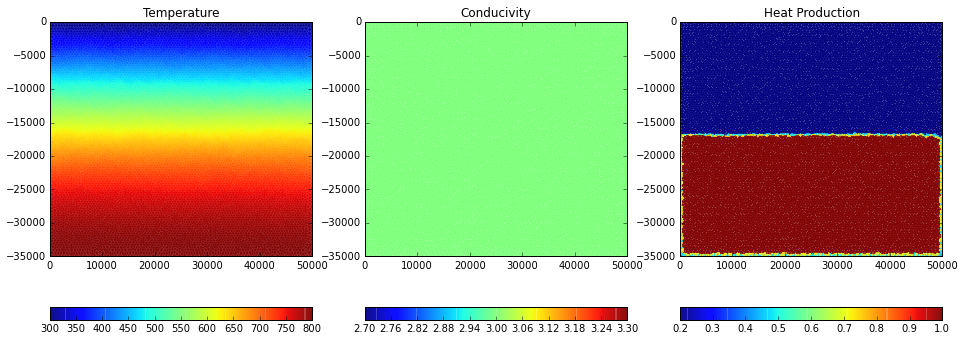

In [5]:
import matplotlib.pyplot as plt

fig, (plot1, plot2, plot3) = plt.subplots(1,3)
fig.set_size_inches(16,6)

sm1 = mesh5.add_node_data_to_plot(plot1, temperatureField, shading="gouraud", alpha=0.75)
plot1.set_xlim([minX, maxX])
plot1.set_ylim([minY, maxY])
fig.colorbar(sm1, ax=plot1, orientation='horizontal')
plot1.set_title('Temperature')

sm2 = mesh5.add_node_data_to_plot(plot2, conductivityField, shading="flat", alpha=0.75)
plot2.set_xlim([minX, maxX])
plot2.set_ylim([minY, maxY])
fig.colorbar(sm2, ax=plot2, orientation='horizontal')
plot2.set_title('Conducivity')

sm3 = mesh5.add_node_data_to_plot(plot3, heatProductionField*1e6, shading="flat", alpha=0.75)
plot3.set_xlim([minX, maxX])
plot3.set_ylim([minY, maxY])
fig.colorbar(sm3, ax=plot3, orientation='horizontal')
plot3.set_title('Heat Production')

plt.show()